In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/churn.csv", na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9832 non-null   int64  
 1   CreditScore      9832 non-null   float64
 2   Geography        9832 non-null   object 
 3   Age              9832 non-null   float64
 4   Balance          9832 non-null   float64
 5   EstimatedSalary  9832 non-null   float64
 6   Exited           9832 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 537.8+ KB


In [2]:
exited_df = df[df['Exited'] == 'Yes']

In [3]:
exited_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 9830
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       2004 non-null   int64  
 1   CreditScore      2004 non-null   float64
 2   Geography        2004 non-null   object 
 3   Age              2004 non-null   float64
 4   Balance          2004 non-null   float64
 5   EstimatedSalary  2004 non-null   float64
 6   Exited           2004 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 125.2+ KB


In [4]:
print(exited_df['Age'].describe())
print(exited_df['Age'].value_counts())

count    2004.000000
mean       44.773952
std         9.956636
min        -1.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64
Age
 46.0    88
 43.0    88
 40.0    86
 45.0    85
 48.0    79
 47.0    76
 42.0    74
 49.0    73
 44.0    72
 50.0    70
 41.0    69
 39.0    68
 52.0    63
 51.0    63
 37.0    61
 38.0    61
 35.0    56
 54.0    51
 36.0    51
 56.0    50
 55.0    47
 33.0    44
 53.0    40
 57.0    37
 31.0    33
 34.0    33
 60.0    32
 32.0    31
 59.0    30
 29.0    28
 58.0    28
 30.0    24
 28.0    23
 62.0    21
 61.0    20
 63.0    18
 24.0    14
 26.0    14
 27.0    13
 22.0    12
 64.0    12
 65.0     8
 66.0     7
 71.0     7
 68.0     6
 25.0     6
 23.0     6
 67.0     5
 70.0     4
 21.0     3
-1.0      3
 20.0     2
 18.0     2
 69.0     2
 73.0     1
 74.0     1
 84.0     1
 19.0     1
 72.0     1
Name: count, dtype: int64


In [5]:
exited_df['EstimatedSalary'].unique()

array([101348.88, 113931.57, 149756.71, ...,  69384.71,  42085.58,
        92888.52])

In [6]:
exited_df = exited_df[exited_df['Age'] >= 1]

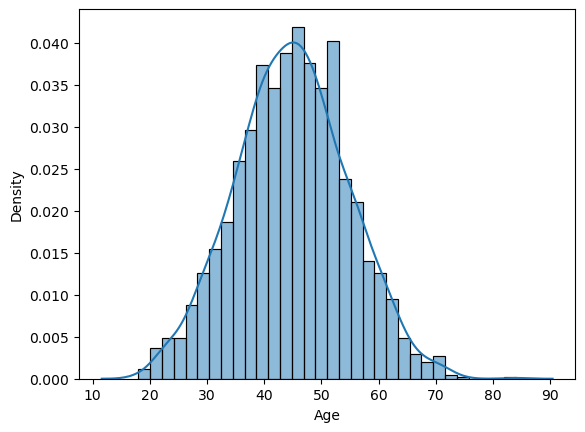

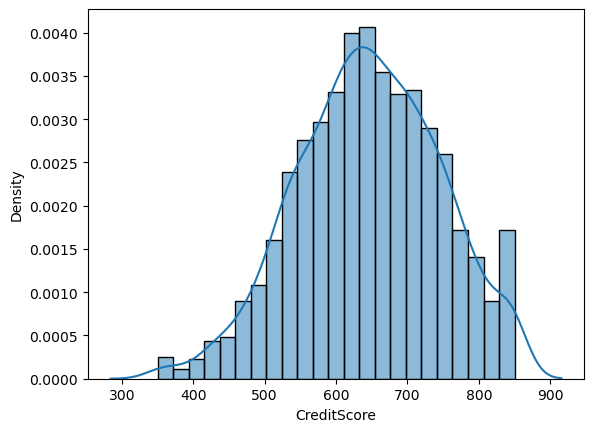

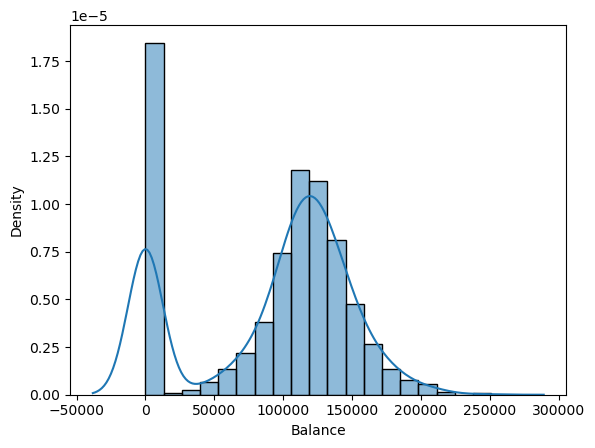

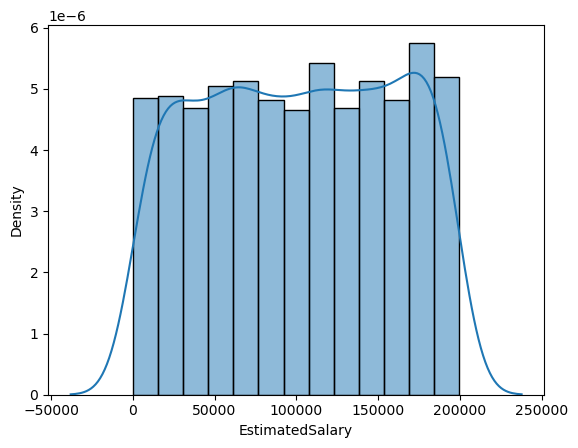

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

age_dist = sns.histplot(exited_df['Age'].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

credit_dist = sns.histplot(exited_df['CreditScore'].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

balance_dist = sns.histplot(exited_df['Balance'].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

estsalary_dist = sns.histplot(exited_df['EstimatedSalary'].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

In [8]:
df2 = exited_df[['CreditScore','Age','Balance','EstimatedSalary']]

In [9]:
from sklearn.preprocessing import StandardScaler

feature_names = df2.columns

X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
feature_names

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], dtype='object')

In [11]:
from sklearn.cluster import KMeans

random_state = 10

model = KMeans(n_clusters=3, random_state=random_state)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 5361.690011953369
Centroid locations:
[ 0.73482671 -0.18342314  0.54789061 -0.21079115]
[-0.82493361  0.20059608  0.51551177  0.23362733]
[-0.0051638   0.00840825 -1.51709678  0.00551236]


In [12]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=random_state)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 3149.403797317292
Centroid locations:
[0.99509527 0.71275067 0.44582947 0.66347395]
[-0.96660132 -0.47649637  0.55621409 -0.7027232 ]
[ 0.2257311  -0.98292261  0.5772844   0.87391437]
[-0.31811959 -0.04294209 -1.5110729   0.77128063]
[ 0.84614909 -0.58711211  0.62374472 -0.98747946]
[-0.91926564  0.51120784  0.45780721  0.95210648]
[-0.16419739  1.21089196  0.40012404 -0.89200105]
[ 0.30253305 -0.02747859 -1.52680628 -0.84852931]


In [15]:
def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size. Increase bin size to be more specific, 
        #but 20 is more than enough
    n_bins = 20  
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        
        # create subplots
        fig, ax = plt.subplots(nrows=4, figsize=(6, len(cols) * 2))
        ax[0].set_title("Cluster {}".format(cluster))
        
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            
            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins, 
                         ax=ax[j], kde=True, stat="density")
            
            # plot the normal distribution with a black line
            sns.kdeplot(data=df[col], ax=ax[j], color="k")
                     
        plt.tight_layout()
        plt.show()

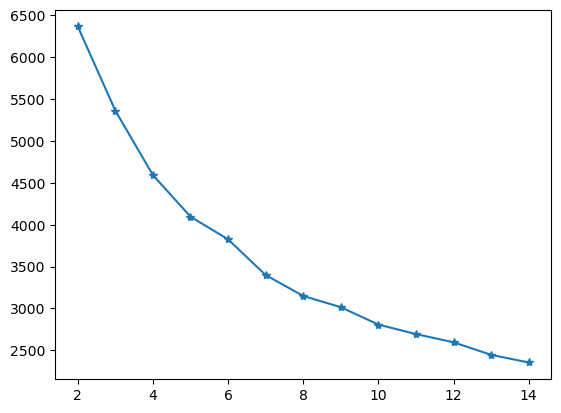

In [17]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
for k in range(2, 15, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# plot the inertia vs K values
plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=3", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=4", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=5", silhouette_score(X, clusters[2].predict(X)))

print(clusters[4])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

KMeans(n_clusters=3, random_state=10)
Silhouette score for k=3 0.20237661154002232
KMeans(n_clusters=4, random_state=10)
Silhouette score for k=4 0.20804052146280397
KMeans(n_clusters=5, random_state=10)
Silhouette score for k=5 0.20804052146280397
KMeans(n_clusters=6, random_state=10)
Silhouette score for k=6 0.20804052146280397


Sum of intra-cluster distance: 4592.518214565027
Centroid locations:
[ 0.49907315 -0.20034326  0.56542611  0.88827884]
[-1.11644     0.40381171  0.45029789  0.21125781]
[ 0.02080781  0.00439485 -1.51620579 -0.00684256]
[ 0.41488743 -0.14304734  0.55261041 -0.98273974]
Cluster membership
Cluster_ID
3    545
2    515
0    506
1    435
Name: count, dtype: int64


/var/folders/hv/lm1j0xn144sg9jjm1v7xk7dm0000gn/T/ipykernel_27503/4137577227.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster_ID'] = y


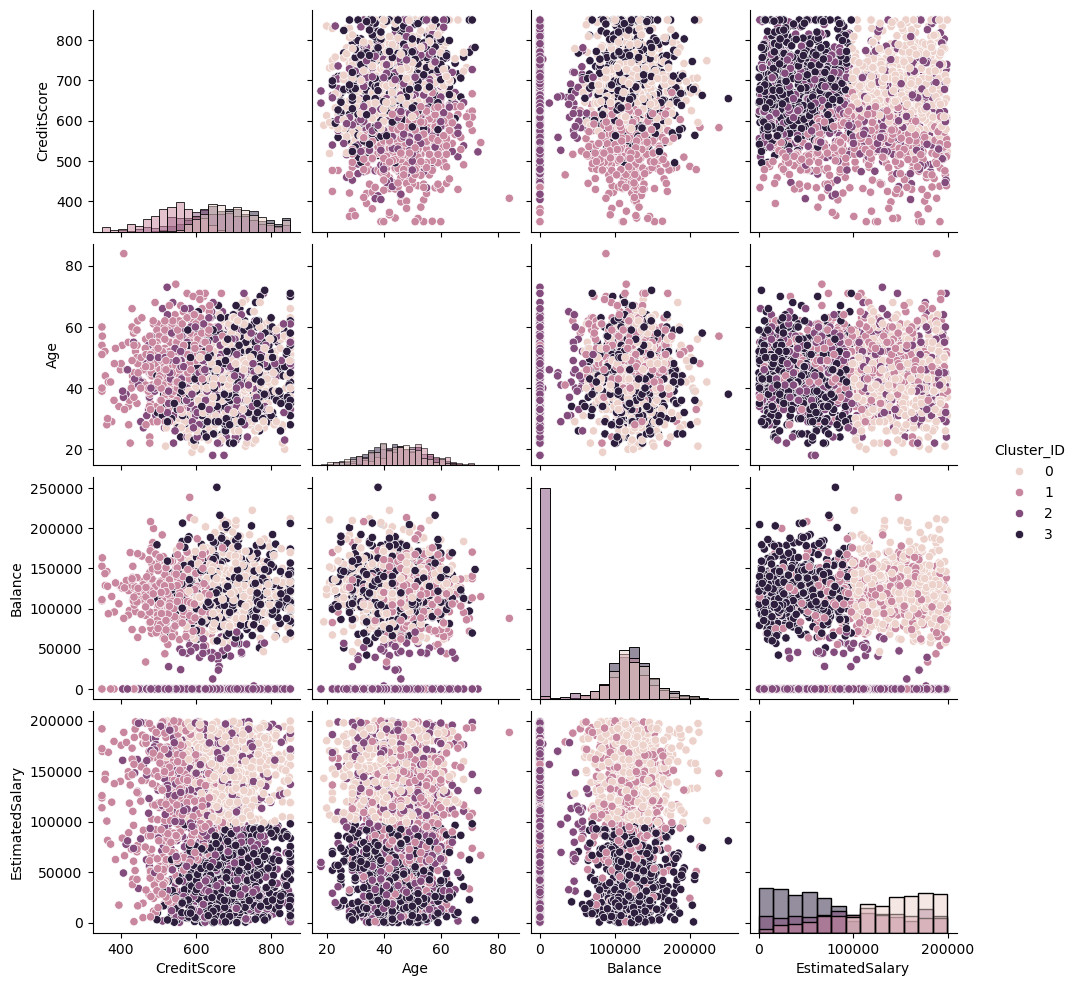

In [19]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=random_state)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for cluster 0


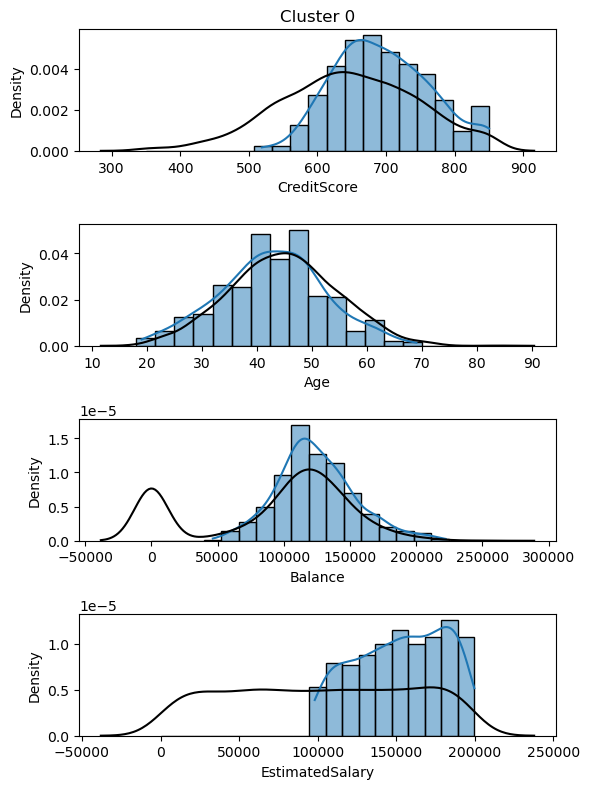

Distribution for cluster 1


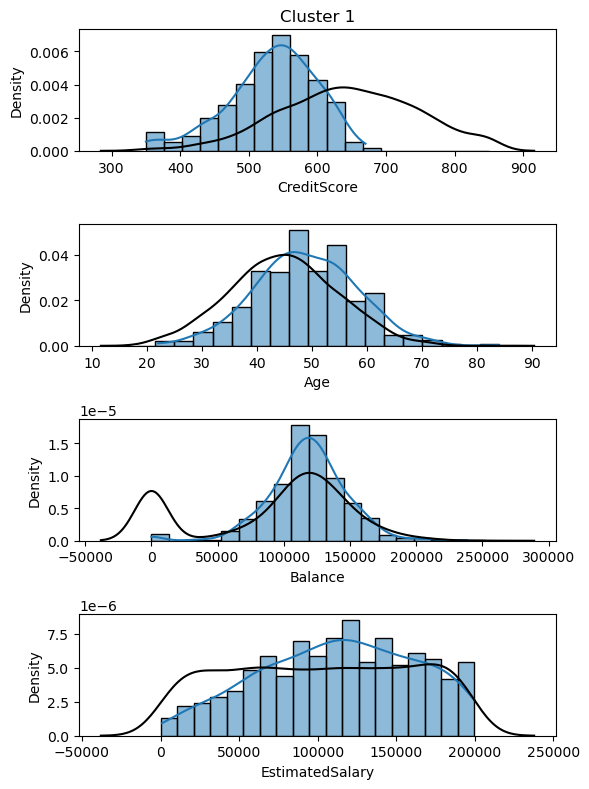

Distribution for cluster 2


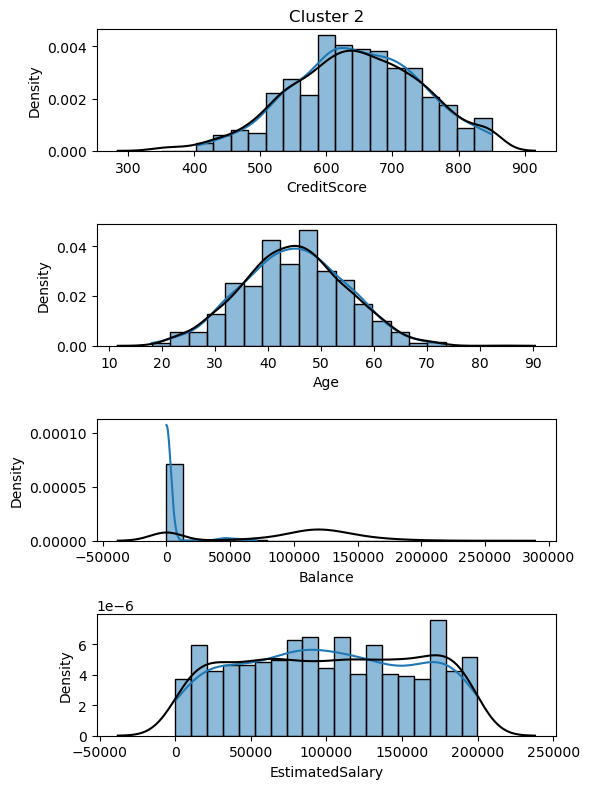

Distribution for cluster 3


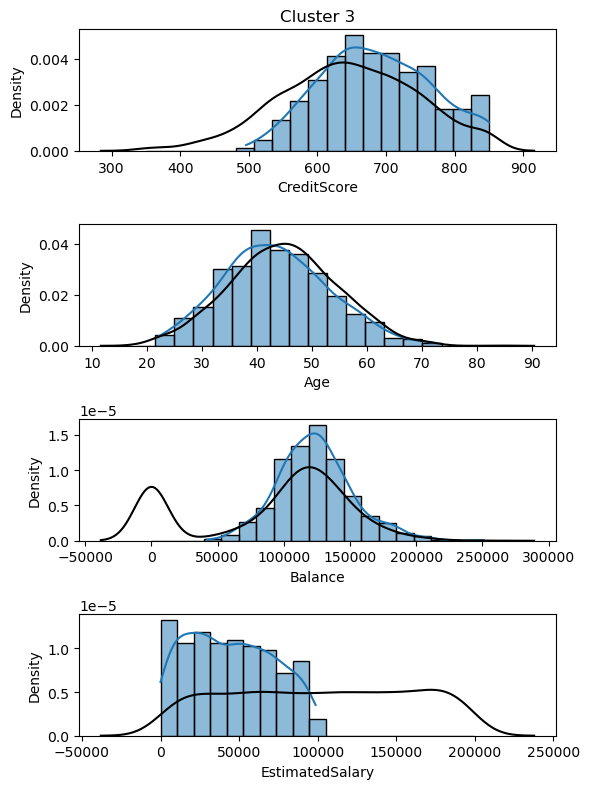

In [20]:
inspect_clusters(df2, feature_names, [0,1,2,3])

In [21]:
df3 = exited_df[['CreditScore','Geography','Age','Balance','EstimatedSalary']]

In [22]:
exited_df['Geography'].unique()

array(['FR', 'ES', 'DE'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df3['Geography'] = le.fit_transform(df3['Geography'].values)

X_new = df3.to_numpy()

X_new = scaler.fit_transform(X_new)

/var/folders/hv/lm1j0xn144sg9jjm1v7xk7dm0000gn/T/ipykernel_27503/1737550029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Geography'] = le.fit_transform(df3['Geography'].values)


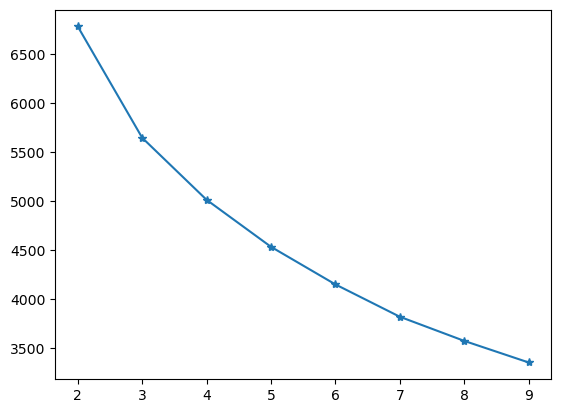

In [24]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

clusters = []
cost_vals = []

for k in range (2, 10, 1):
    model_new = KPrototypes(n_clusters = k, random_state = random_state, n_jobs = -1)
    model_new.fit_predict(X_new, categorical = [1])

    clusters.append(model_new)
    cost_vals.append(model_new.cost_)

plt.plot(range(2, 10, 1), cost_vals, marker = '*')
plt.show()

In [25]:
X_num = [[row[0], row[2], row[3], row[4]] for row in X_new]
X_cat = [[row[1]] for row in X_new]

model_new = clusters[1] # 3 clusters
silScoreNums = silhouette_score(X_num, model_new.fit_predict(X_new, categorical = [1]), metric = 'euclidean')
print("Silscore for numeric variables:", silScoreNums)

silScoreCats = silhouette_score(X_cat, model_new.fit_predict(X_new, categorical = [1]), metric = 'hamming')
print("Silscore for categorical variables:", silScoreCats)

silScore_3 = (silScoreNums + silScoreCats) / 2
print("The average silhouette score for k = 3:", silScore_3)

Silscore for numeric variables: 0.22617553853190348
Silscore for categorical variables: -0.025791442220916908
The average silhouette score for k = 3: 0.10019204815549329


In [26]:
X_num = [[row[0], row[2], row[3], row[4]] for row in X_new]
X_cat = [[row[1]] for row in X_new]

model_new = clusters[2] # 4 clusters
silScoreNums = silhouette_score(X_num, model_new.fit_predict(X_new, categorical = [1]), metric = 'euclidean')
print("Silscore for numeric variables:", silScoreNums)

silScoreCats = silhouette_score(X_cat, model_new.fit_predict(X_new, categorical = [1]), metric = 'hamming')
print("Silscore for categorical variables:", silScoreCats)

silScore_4 = (silScoreNums + silScoreCats) / 2
print("The average silhouette score for k = 4:", silScore_4)

Silscore for numeric variables: 0.20892767603463316
Silscore for categorical variables: -0.04109998862392425
The average silhouette score for k = 4: 0.08391384370535446


In [27]:
X_num = [[row[0], row[2], row[3], row[4]] for row in X_new]
X_cat = [[row[1]] for row in X_new]

model_new = clusters[3] # 5 clusters
silScoreNums = silhouette_score(X_num, model_new.fit_predict(X_new, categorical = [1]), metric = 'euclidean')
print("Silscore for numeric variables:", silScoreNums)

silScoreCats = silhouette_score(X_cat, model_new.fit_predict(X_new, categorical = [1]), metric = 'hamming')
print("Silscore for categorical variables:", silScoreCats)

silScore_5 = (silScoreNums + silScoreCats) / 2
print("The average silhouette score for k = 4:", silScore_5)

Silscore for numeric variables: 0.20666271552654128
Silscore for categorical variables: -0.06565350351970425
The average silhouette score for k = 4: 0.07050460600341851


/var/folders/hv/lm1j0xn144sg9jjm1v7xk7dm0000gn/T/ipykernel_27503/1040545482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Cluster_ID'] = y


Cluster membership
Cluster_ID
2    532
1    524
3    523
0    422
Name: count, dtype: int64


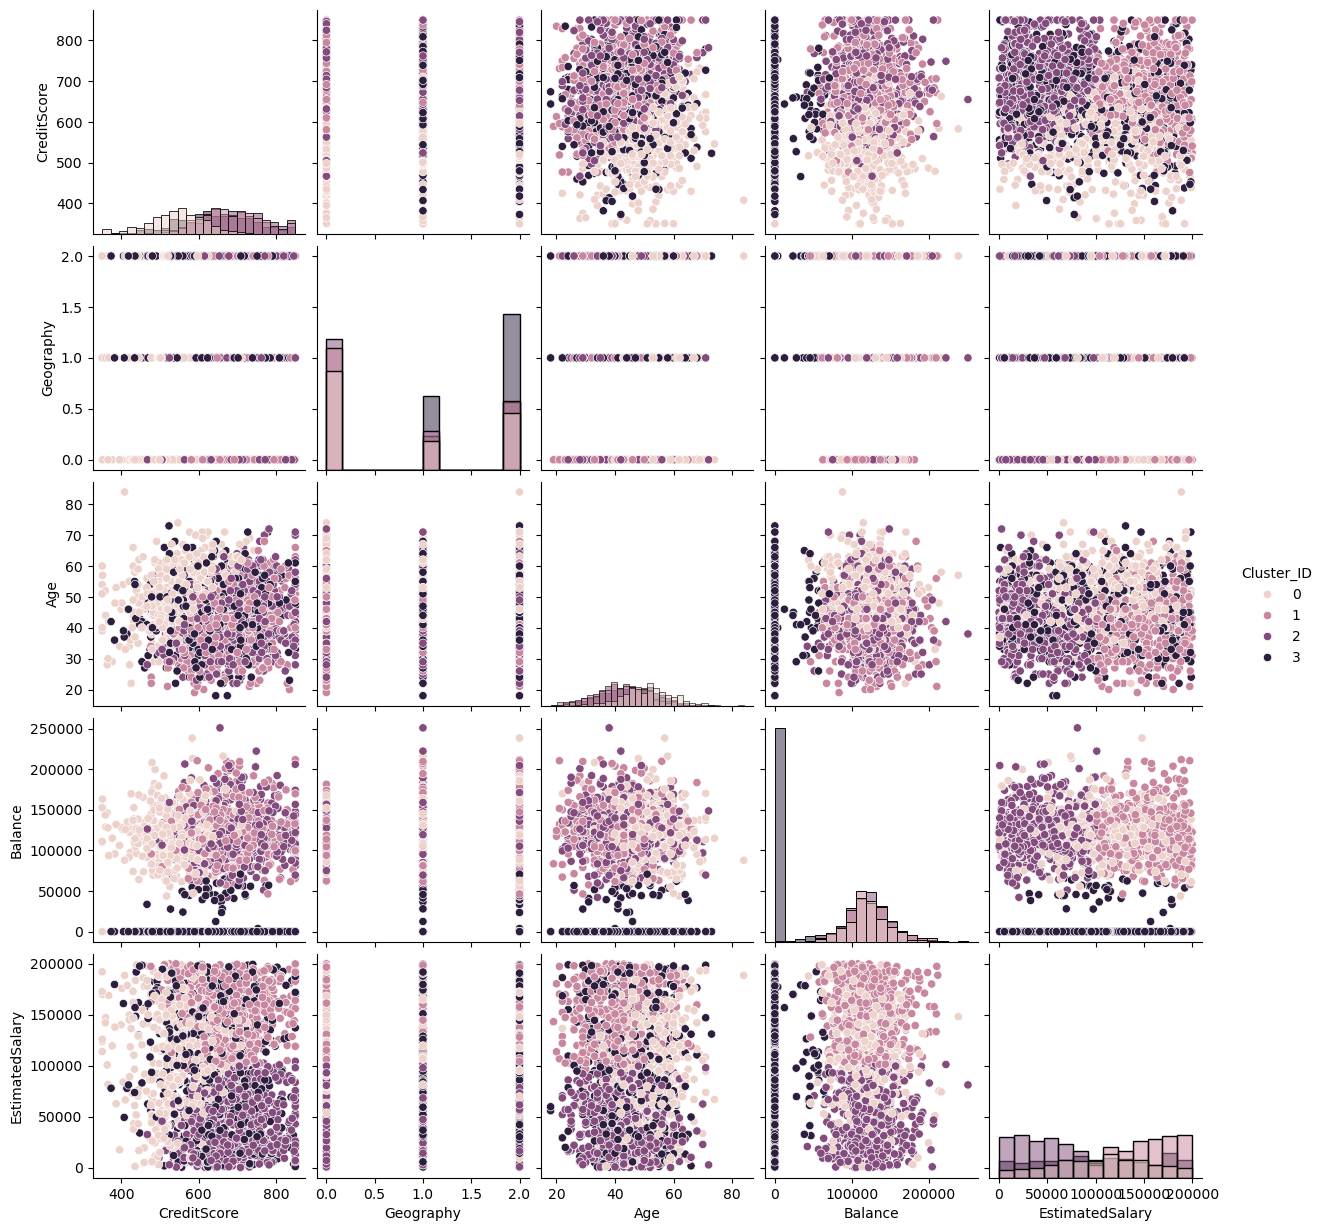

In [28]:
# visualisation of K=4 clustering solution
model_new = KPrototypes(n_clusters = 4, random_state = random_state, n_jobs = -1)
model_new.fit_predict(X_new, categorical = [1])

y = model_new.fit_predict(X_new, categorical = [1])
df3['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df3, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [99]:
def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size. Increase bin size to be more specific, 
        #but 20 is more than enough
    n_bins = 20  
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        
        # create subplots
        fig, ax = plt.subplots(nrows=6, figsize=(6, len(cols) * 2))
        ax[0].set_title("Cluster {}".format(cluster))
        
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)

            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins, 
                         ax=ax[j], kde=True, stat="density")
            
            # plot the normal distribution with a black line
            sns.kdeplot(data=df[col], ax=ax[j], color="k")
                     
        plt.tight_layout()
        plt.show()

In [67]:
feature_names_cat = df3.columns

Distribution for cluster 0


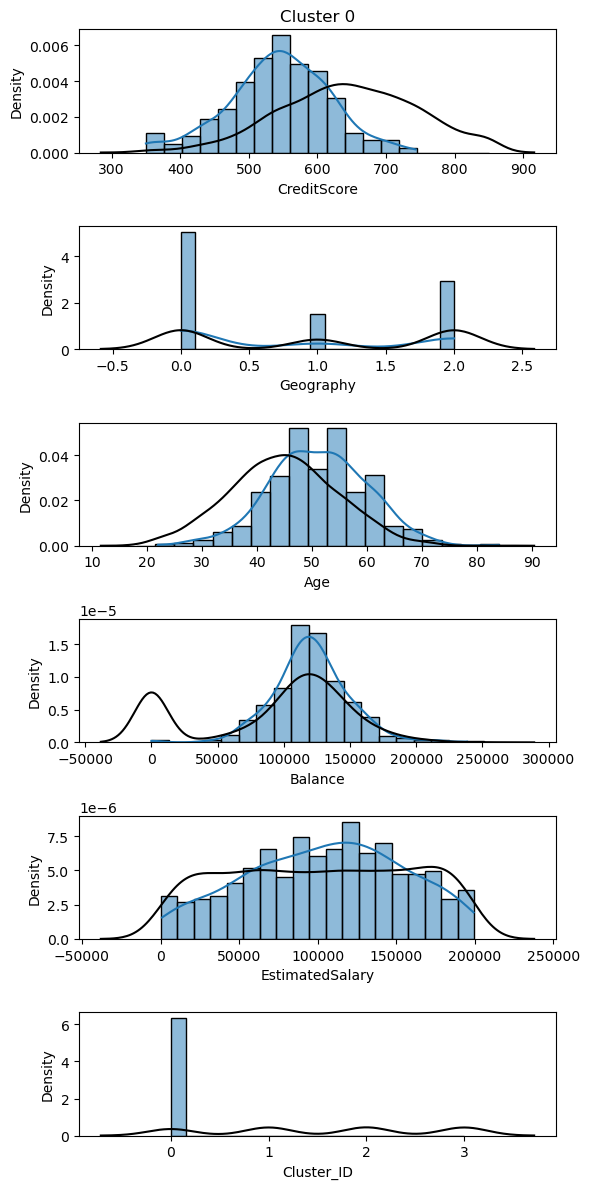

Distribution for cluster 1


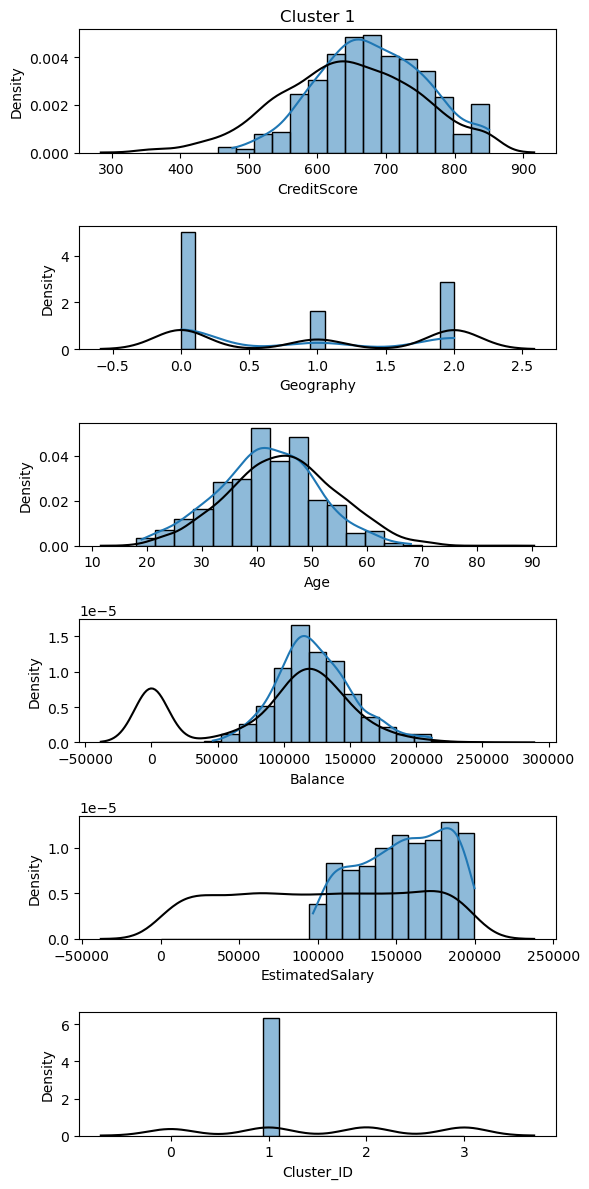

Distribution for cluster 2


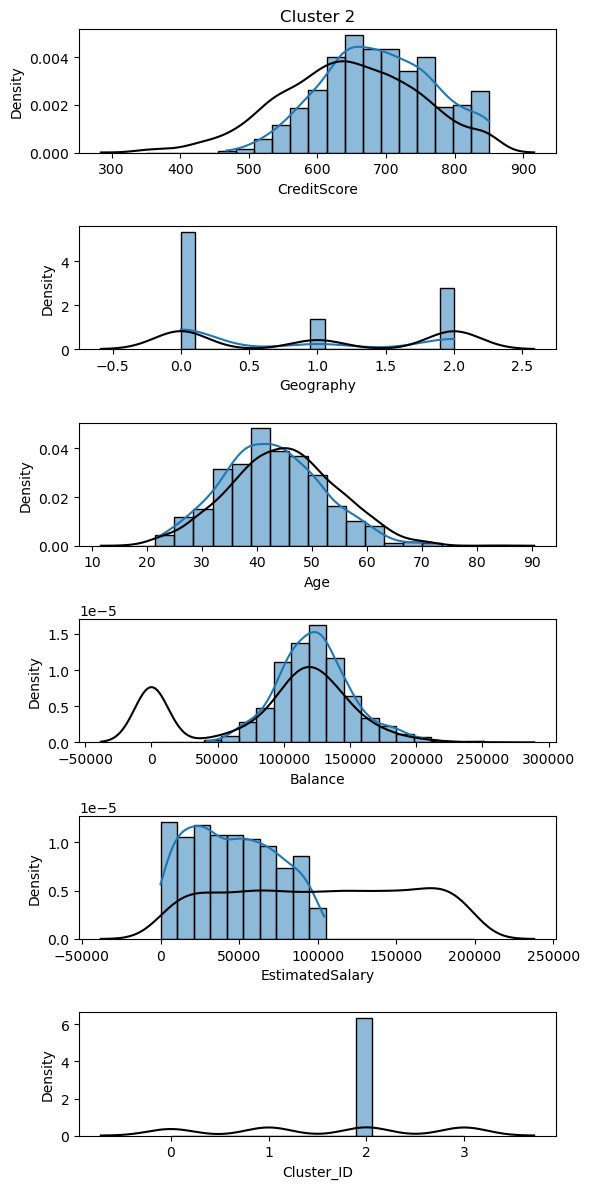

Distribution for cluster 3


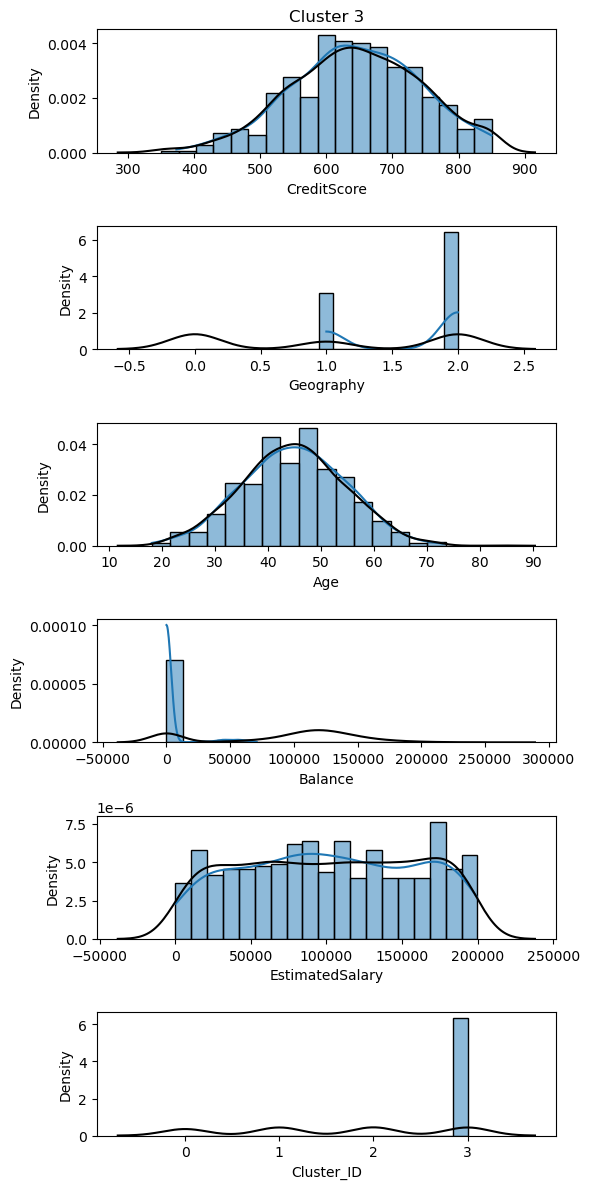

In [101]:
inspect_clusters(df3, feature_names_cat, [0,1,2,3])

In [97]:
feature_names_cat

Index(['CreditScore', 'Geography', 'Age', 'Balance', 'EstimatedSalary',
       'Cluster_ID'],
      dtype='object')